The `temporal factor score `is a measure of how much participants organize their recall of information based on the time they learned it. 

In this notebook, we will compute the temporal factor score for each participant on the level of (1) idea units and (2) sentences, and examine how it correlates with "recall achievement", the amount of information they totally remembered.

## (1) Idea-Level

Correlation: 0.45


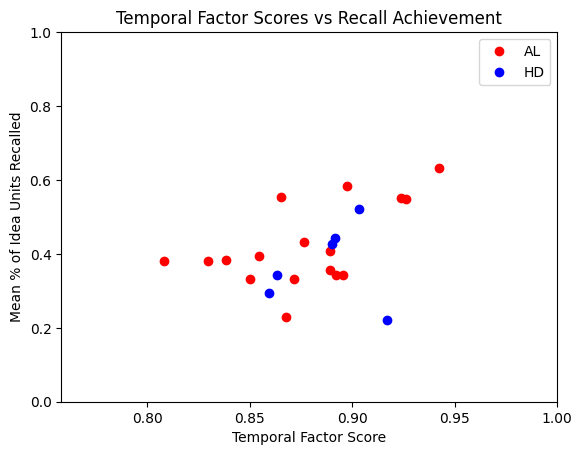

In [10]:
# (0) Load in the dataframe from the csv

import pandas as pd
from psifr import fr
import matplotlib.pyplot as plt
import numpy as np

data_path = "C:\\Summer 2023 - DSI-SRP\\featureFR\\My Analysis\\data\\psifr_al1_ml1.csv"
df = pd.read_csv(data_path)


# (1) For each subject, calculate the total percent of information they remembered and
#     the temporal factor score of their recalls.
subject_lst = df["subject_id"].unique().tolist()

mean_rec_lst = df[['subject', 'recall']].groupby('subject').mean()['recall'].to_list()

temp_fact_lst = fr.lag_rank(df)['rank'].to_list()

plotting_df = pd.DataFrame({"subject": subject_lst,  
                            "temp_fact": temp_fact_lst,
                            "mean_rec": mean_rec_lst})


# (2) Plot Temporal Factor Score vs Mean Recall based study group
plotting_df["study"] = [string[:2] for string in plotting_df["subject"]]
studies = plotting_df["study"].unique()
color_strings = ["ro", "bo", "go"]

for i, study in enumerate(studies):
    study_df = plotting_df.query(f"study == '{study}'")
    plt.plot(study_df.temp_fact, study_df.mean_rec, color_strings[i], label=study)
    
plt.legend()     
plt.xlim(min(temp_fact_lst)-.05, 1)
plt.ylim(0, 1)
plt.legend(["AL", "HD", "ML"])
plt.xlabel("Temporal Factor Score")
plt.ylabel("Mean % of Idea Units Recalled")
plt.title("Temporal Factor Scores vs Recall Achievement");

# (3) Compute the correlation 
correlation = plotting_df[["temp_fact", "mean_rec"]].corr().iloc[0]["mean_rec"]
print("Correlation: {:.2f}".format(correlation))

# FIXME: Get 95% confidence interval for correlation using bootstrapping


###### Linear Regression from Scratch

In [ ]:
# Let's try to perform least squares manually! (again we are looking for an equation at + b = m, where t = temporal factor, m = mean info recalled)
# A_T = np.array(
#     [
#         temp_fact,
#         [1] * len(temp_fact)
#     ]
# )
# A = A_T.transpose()
# A_TA_inv = np.linalg.inv(np.matmul(A_T, A))
# ls_soln = np.matmul(A_TA_inv, np.matmul(A_T, np.array(mean_rec))) # [a,b] a = slope, b = y-intercept
# print("Slope:", ls_soln[0], "\nY-Intercept:", ls_soln[1])
# plt.plot([0, 1], [ls_soln[1], ls_soln[0] + ls_soln[1]], "b-")

# plt.xlim(np.min(temp_fact)-.05, np.max(temp_fact)+.05)
# plt.ylim(np.min(mean_rec)-.05, np.max(mean_rec)+.05)
# plt.xlabel("Temporal Factor Score")
# plt.ylabel("Percent of Information Recalled")
# plt.title("Temporal Factor Scores vs Recall Achievement");

## (2) Sentence-Level

Correlation: 0.36


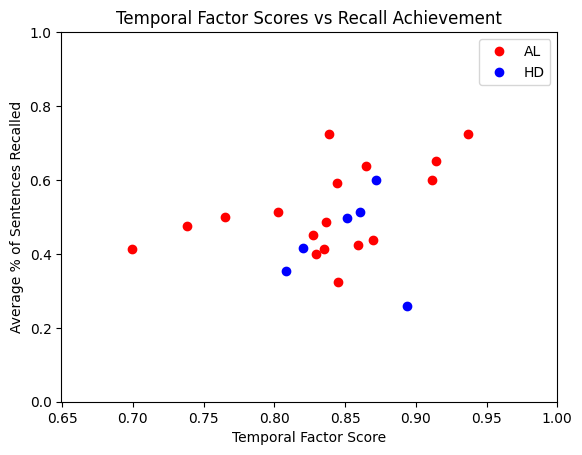

In [11]:
# (0) Load in the dataframe from the csv

import pandas as pd
from psifr import fr
import matplotlib.pyplot as plt
import numpy as np

data_path = "C:\\Summer 2023 - DSI-SRP\\featureFR\\My Analysis\\data\\psifr_al1_ml1_sl.csv"
df = pd.read_csv(data_path)


# (1) For each subject, calculate the total percent of information they remembered and
#     the temporal factor score of their recalls.
subject_lst = df["subject_id"].unique().tolist()

mean_rec_lst = df[['subject', 'recall']].groupby('subject').mean()['recall'].to_list()

temp_fact_lst = fr.lag_rank(df)['rank'].to_list()

plotting_df = pd.DataFrame({"subject": subject_lst,  
                            "temp_fact": temp_fact_lst,
                            "mean_rec": mean_rec_lst})


# (2) Plot Temporal Factor Score vs Mean Recall based study group
plotting_df["study"] = [string[:2] for string in plotting_df["subject"]]
studies = plotting_df["study"].unique()
color_strings = ["ro", "bo", "go"]

for i, study in enumerate(studies):
    study_df = plotting_df.query(f"study == '{study}'")
    plt.plot(study_df.temp_fact, study_df.mean_rec, color_strings[i], label=study)
    
plt.legend()     
plt.xlim(min(temp_fact_lst)-.05, 1)
plt.ylim(0, 1)
plt.legend(["AL", "HD", "ML"])
plt.xlabel("Temporal Factor Score")
plt.ylabel("Average % of Sentences Recalled")
plt.title("Temporal Factor Scores vs Recall Achievement");

# (3) Compute the correlation 
correlation = plotting_df[["temp_fact", "mean_rec"]].corr().iloc[0]["mean_rec"]
print("Correlation: {:.2f}".format(correlation))

# FIXME: Get 95% confidence interval for correlation using bootstrapping


*Notes:*

* For sentence level, the temporal factor score varies more (.7 - .95) that at the idea unit level (.8 - .95).

---

**Conclusion.** In this notebook, we see that there is positive correlation between temporal factor score and recall performance. Is this meaningful?

 * From what I've seen in the data, most people tend to remember one thing from the passage and then try to rememeber the next thing that was described in the passage. Perhaps better memory performance `->` higher temporal factor scores because using this strategy they are able to remember information close together rather than having to jump farther ahead in the passage.